<a href="https://colab.research.google.com/github/AjengSyifaa/Tugas-Machine-Learning/blob/main/Praktik%20Pertemuan%204_Saklar%20Chap4_4112322002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4 Feature Engineering and Selection**

# **1. Feature Engineering on Numeric Data**

In [451]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100


Data yang digunakan pada praktik adalah data karakter fiksi Pokémon.

In [452]:
poke_df = pd.read_csv('/content/Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [453]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [454]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


In [455]:
popsong_df = pd.read_csv('/content/song_views.csv', encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


## **Binarization**

In [456]:
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [457]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


## **Rounding (Pembulatan)**

In [458]:
items_popularity = pd.read_csv('/content/item_popularity.csv', encoding='utf-8')
items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [459]:
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


## **Interaksi**

In [460]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [461]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [462]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [463]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


## **Transforming new data in the future (during predictions)**

Mengubah data baru dimasa depan

In [464]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]],
                      columns=['Attack', 'Defense'])
new_df

,Attack,Defense
0,95,75
1,121,120
2,77,60


In [465]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res,
                                 columns=['Attack', 'Defense',
                                          'Attack^2', 'Attack x Defense', 'Defense^2'])
new_intr_features


,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


## **Binning**

In [466]:
fcc_survey_df = pd.read_csv('/content/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## **Fixed-width binning (Binning dengan lebar tetap)**

Text(0, 0.5, 'Frequency')

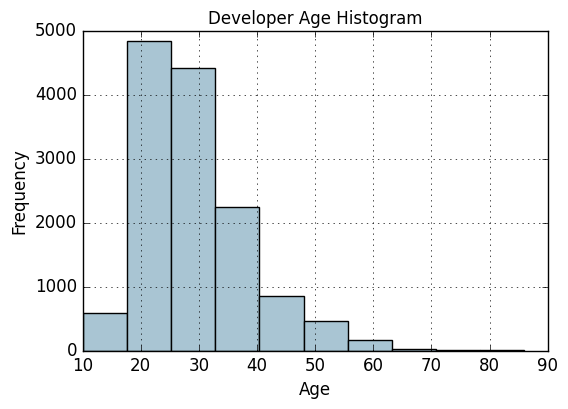

In [467]:
# Developer age distribution (distribusi usia pengembang)

fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [468]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [469]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']),
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']),
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round',
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


## **Quantile based binning (Binning berbasis kuantitas)**

In [470]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0, 0.5, 'Frequency')

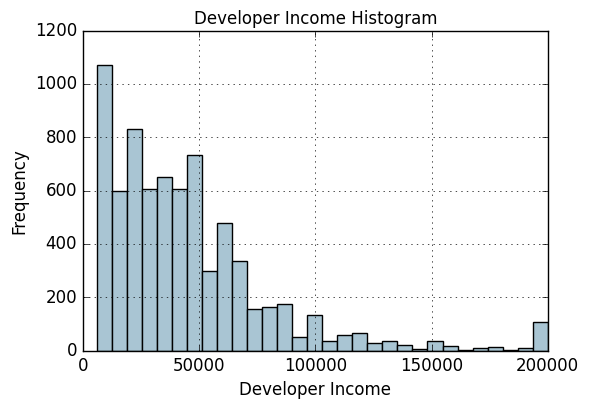

In [471]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [472]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

,Income
0.00,6000.0
0.25,20000.0
0.50,37000.0
0.75,60000.0
1.00,200000.0


Text(0, 0.5, 'Frequency')

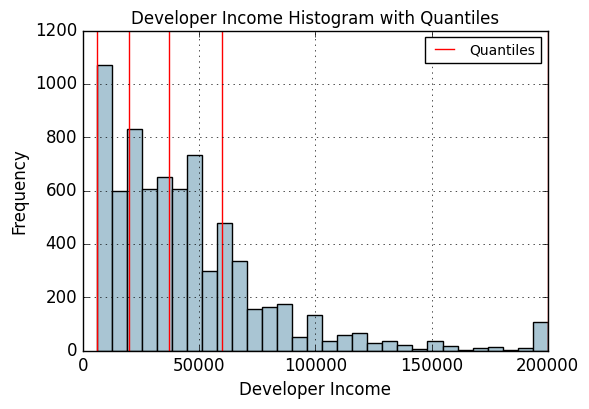

In [473]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [474]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'],
                                                 q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'],
                                                 q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income',
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


## **Log transform**

In [475]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

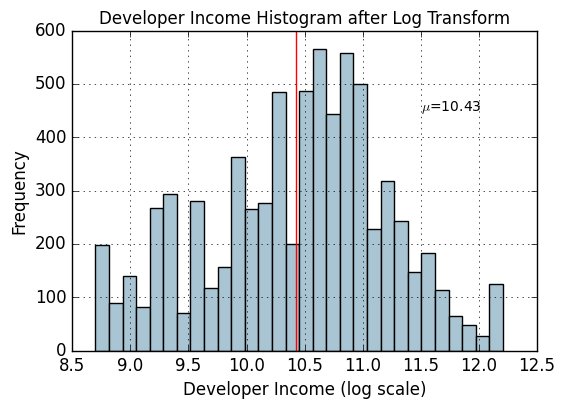

In [476]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

## **Box–Cox transform**

In [477]:
# get optimal lambda value from non null income values
# dapatkan nilai lamda optimal dari data pendapatan bukan nol
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799122497647785


In [478]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox((1+fcc_survey_df['Income']),
                                                         lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc_survey_df['Income'],
                                                           lmbda=opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log',
               'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180667
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115340
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346418
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115340
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637128


Text(24, 450, '$\\mu$=20.65')

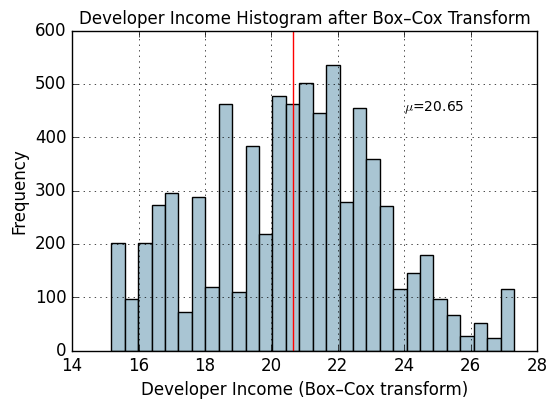

In [479]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)

## **2. Feature Engineering on Categorical Data**

Label kategori atau kelas dapat berupa teks atau numerik. Biasanya ada dua jenis variabel kategori nominal dan ordinal. Fitur kategoris nominal sedemikian rupa sehingga tidak ada konsep pengurutan di antara nilai-nilai tersebut, yaitu, tidak masuk akal untuk mengurutkan atau menatanya. Genre film atau gim video, musim cuaca, dan nama negara adalah beberapa contoh atribut nominal. Variabel kategoris ordinal dapat diurutkan dan disortir berdasarkan nilainya dan karenanya nilai-nilai ini memiliki signifikansi khusus sehingga urutannya masuk akal. Contoh atribut ordinal meliputi ukuran pakaian, tingkat pendidikan, dan sebagainya.

In [480]:
import pandas as pd
import numpy as np

## **Mengubah Kolom Nominal**

Fitur atau atribut nominal adalah variabel kategorik yang biasanya memiliki sekumpulan nilai diskrit yang terbatas. Seringkali nilai-nilai ini dalam format string atau teks dan algoritme Pembelajaran Mesin tidak dapat memahaminya secara langsung. Oleh karena itu, perlu mengubah fitur-fitur ini menjadi format numerik yang lebih representatif. berikut penerapannya menggunakan data penjualan video game.

In [481]:
vg_df = pd.read_csv('/content/vgsales.csv', encoding='utf-8')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [482]:
genres = np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [483]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [484]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


## **Mengubah Kolom Ordinal**
Fitur ordinal adalah data yang penomoran obyek atau kategorinya disusun menurut besarnya dengan jarak/rentang yang tidak harus sama. Fitur ordinal mungkin ada dalam bentuk teks, sehingga perlu memetakan dan mengubahnya menjadi numerik. berikut penerapannya menggunakan data Pokémon yang telah digunakan sebelumnya dan melihat berbagai nilai atribut Generasi untuk setiap Pokémon.

In [485]:
poke_df = pd.read_csv('/content/Pokemon.csv', encoding='utf-8')
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)

np.unique(poke_df['Generation'])

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'], dtype=object)

In [486]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3,
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6}

poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[4:10]

,Name,Generation,GenerationLabel
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


## **Pengodean Kolom Kategorik**

## **One-hot Encoding Scheme**
skema penyandian one-hot, menyandikan atau mengubah fitur menjadi *m* fitur biner, yang hanya dapat berisi nilai 1 atau 0. Oleh karena itu, setiap pengamatan dalam fitur kategoris diubah menjadi vektor berukuran *m* dengan hanya satu nilai sebagai 1 (yang menunjukkannya sebagai aktif).

In [487]:
poke_df[['Name', 'Generation', 'Legendary']].iloc[4:10]

,Name,Generation,Legendary
4,Octillery,Gen 2,False
5,Helioptile,Gen 6,False
6,Dialga,Gen 4,True
7,DeoxysDefense Forme,Gen 3,True
8,Rapidash,Gen 1,False
9,Swanna,Gen 5,False


In [488]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# # mengubah dan memetakan Generation pokemon
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = gen_labels

# mengubah dan memetakan status Legendary pokemon
leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = leg_labels

poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_sub.iloc[4:10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Octillery,Gen 2,1,False,0
5,Helioptile,Gen 6,5,False,0
6,Dialga,Gen 4,3,True,1
7,DeoxysDefense Forme,Gen 3,2,True,1
8,Rapidash,Gen 1,0,False,0
9,Swanna,Gen 5,4,False,0


In [489]:
# mengkodekan label Generation menggunakan skema pengodean one-hot
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)

# mengodekan label Legendary Status menggunakan skema pengodean one-hot
leg_ohe = OneHotEncoder()
leg_feature_arr = leg_ohe.fit_transform(poke_df[['Lgnd_Label']]).toarray()
leg_feature_labels = ['Legendary_'+str(cls_label) for cls_label in leg_le.classes_]
leg_features = pd.DataFrame(leg_feature_arr, columns=leg_feature_labels)

In [490]:
poke_df_ohe = pd.concat([poke_df_sub, gen_features, leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'],gen_feature_labels,
              ['Legendary', 'Lgnd_Label'],leg_feature_labels], [])
poke_df_ohe[columns].iloc[4:10]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
4,Octillery,Gen 2,1,0.0,1.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5,Helioptile,Gen 6,5,0.0,0.0,0.0,0.0,0.0,1.0,False,0,1.0,0.0
6,Dialga,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,True,1,0.0,1.0
7,DeoxysDefense Forme,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
8,Rapidash,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
9,Swanna,Gen 5,4,0.0,0.0,0.0,0.0,1.0,0.0,False,0,1.0,0.0


In [491]:
new_poke_df = pd.DataFrame([['PikaZoom', 'Gen 3', True], ['CharMyToast', 'Gen 4', False]],
                           columns=['Name', 'Generation', 'Legendary'])
new_poke_df

,Name,Generation,Legendary
0,PikaZoom,Gen 3,True
1,CharMyToast,Gen 4,False


In [492]:
new_gen_labels = gen_le.transform(new_poke_df['Generation'])
new_poke_df['Gen_Label'] = new_gen_labels

new_leg_labels = leg_le.transform(new_poke_df['Legendary'])
new_poke_df['Lgnd_Label'] = new_leg_labels

new_poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
0,PikaZoom,Gen 3,2,True,1
1,CharMyToast,Gen 4,3,False,0


In [493]:
new_gen_feature_arr = gen_ohe.transform(new_poke_df[['Gen_Label']]).toarray()
new_gen_features = pd.DataFrame(new_gen_feature_arr, columns=gen_feature_labels)

new_leg_feature_arr = leg_ohe.transform(new_poke_df[['Lgnd_Label']]).toarray()
new_leg_features = pd.DataFrame(new_leg_feature_arr, columns=leg_feature_labels)

new_poke_ohe = pd.concat([new_poke_df, new_gen_features, new_leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'], gen_feature_labels,
               ['Legendary', 'Lgnd_Label'], leg_feature_labels], [])
new_poke_ohe[columns]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
0,PikaZoom,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
1,CharMyToast,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,False,0,1.0,0.0


In [494]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
pd.concat([poke_df[['Name', 'Generation']], gen_onehot_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,False,True,False,False,False,False
5,Helioptile,Gen 6,False,False,False,False,False,True
6,Dialga,Gen 4,False,False,False,True,False,False
7,DeoxysDefense Forme,Gen 3,False,False,True,False,False,False
8,Rapidash,Gen 1,True,False,False,False,False,False
9,Swanna,Gen 5,False,False,False,False,True,False


## **Dummy**
Skema pengkodean dummy mirip dengan skema pengkodean one-hot. Namun, dalam kasus skema pengkodean dummy, ketika diterapkan pada fitur kategoris dengan *m* label berbeda, kita memperoleh *m-1* fitur biner. Jadi, setiap nilai variabel kategoris diubah menjadi vektor berukuran *m-1*. Fitur tambahan diabaikan sepenuhnya dan dengan demikian, jika nilai kategori berkisar dari {0, 1, ..., m-1}, fitur ke-0 atau ke-*m-1* biasanya direpresentasikan oleh vektor yang semuanya nol (0). Kode berikut menggambarkan skema pengkodean dummy pada Pokémon Generation dengan membuang fitur yang dikodekan biner tingkat pertama (Gen 1).

In [495]:
gen_dummy_features = pd.get_dummies(poke_df['Generation'], drop_first=True)
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,True,False,False,False,False
5,Helioptile,Gen 6,False,False,False,False,True
6,Dialga,Gen 4,False,False,True,False,False
7,DeoxysDefense Forme,Gen 3,False,True,False,False,False
8,Rapidash,Gen 1,False,False,False,False,False
9,Swanna,Gen 5,False,False,False,True,False


In [496]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_dummy_features = gen_onehot_features.iloc[:,:-1]
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,False,True,False,False,False
5,Helioptile,Gen 6,False,False,False,False,False
6,Dialga,Gen 4,False,False,False,True,False
7,DeoxysDefense Forme,Gen 3,False,False,True,False,False
8,Rapidash,Gen 1,True,False,False,False,False
9,Swanna,Gen 5,False,False,False,False,True


## **Pengkodean Efek**
Skema pengkodean efek sangat mirip dengan skema pengkodean tiruan dalam banyak aspek. Akan tetapi, fitur yang dikodekan atau vektor fitur, untuk nilai kategori yang mewakili semua angka 0 dalam skema pengkodean tiruan, digantikan oleh -1 dalam skema pengkodean efek. Kode berikut menggambarkan skema pengkodean efek pada fitur Generasi Pokémon.

In [497]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_effect_features = gen_onehot_features.iloc[:,:-1]
gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
pd.concat([poke_df[['Name', 'Generation']], gen_effect_features], axis=1).iloc[4:10]


<ipython-input-497-2dc4e33c7854>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
<ipython-input-497-2dc4e33c7854>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
<ipython-input-497-2dc4e33c7854>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
<ipytho

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,False,True,False,False,False
5,Helioptile,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
6,Dialga,Gen 4,False,False,False,True,False
7,DeoxysDefense Forme,Gen 3,False,False,True,False,False
8,Rapidash,Gen 1,True,False,False,False,False
9,Swanna,Gen 5,False,False,False,False,True


## **Feature Hashing scheme**
Skema hashing fitur merupakan skema rekayasa fitur lain yang berguna untuk menangani fitur kategoris berskala besar. Dalam skema ini, fungsi hash biasanya digunakan dengan jumlah fitur yang dikodekan yang telah ditetapkan sebelumnya (sebagai vektor dengan panjang yang telah ditentukan sebelumnya) sehingga nilai hash dari fitur tersebut digunakan sebagai indeks dalam vektor yang telah ditentukan sebelumnya dan nilai diperbarui sebagaimana mestinya. Karena fungsi hash memetakan sejumlah besar nilai ke dalam sekumpulan nilai terbatas yang kecil, beberapa nilai yang berbeda dapat membuat hash yang sama yang disebut sebagai tabrakan. Biasanya, fungsi hash bertanda digunakan sehingga tanda dari nilai yang diperoleh dari hash digunakan sebagai tanda dari nilai yang disimpan dalam vektor fitur akhir pada indeks yang sesuai. Ini akan memastikan tabrakan yang lebih sedikit dan akumulasi kesalahan yang lebih sedikit karena tabrakan.

Skema hash bekerja pada string, angka, dan struktur lain seperti vektor. Meskipun terdapat lebih dari 1000 kategori berbeda dalam suatu fitur dan menetapkan h = 10, set fitur keluaran tetap memiliki 10 fitur dibandingkan dengan 1000 fitur jika menggunakan skema pengodean one hot. Berikut penerapannya yang menunjukkan jumlah genre berbeda dalam kumpulan data video game.

In [498]:
unique_genres = np.unique(vg_df[['Genre']])
print("Total game genres:", len(unique_genres))
print(unique_genres)

Total game genres: 12
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


In [499]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')

hashed_features = fh.fit_transform(vg_df['Genre'].apply(lambda x: [x]))
hashed_features = hashed_features.toarray()
pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,0.0,0.0,1.0,0.0,0.0
2,Mario Kart Wii,Racing,0.0,1.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,Sports,0.0,0.0,-1.0,0.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,0.0,0.0,0.0,-1.0,0.0,0.0
5,Tetris,Puzzle,0.0,0.0,-1.0,0.0,0.0,0.0
6,New Super Mario Bros.,Platform,0.0,0.0,0.0,1.0,0.0,0.0


In [500]:
fh.get_params()

{'alternate_sign': True,
 'dtype': numpy.float64,
 'input_type': 'string',
 'n_features': 6}

# **3. Feature Engineering on Text Data**
Berurusan dengan atribut data terstruktur seperti variabel numerik atau kategoris biasanya tidak sesulit atribut tidak terstruktur seperti teks dan gambar. Dalam kasus data tidak terstruktur seperti dokumen teks, tantangan pertama adalah berurusan dengan sifat sintaksis, format, dan konten dokumen yang tidak dapat diprediksi, yang membuatnya sulit untuk mengekstrak informasi yang berguna untuk membangun model. Tantangan kedua adalah mengubah representasi tekstual ini menjadi representasi numerik yang dapat dipahami oleh algoritma Machine Learning. Ada berbagai teknik rekayasa fitur yang digunakan oleh ilmuwan data setiap hari untuk mengekstrak vektor fitur numerik dari teks tidak terstruktur. Sebelum memulai, perlu diingat bahwa ada dua aspek untuk menjalankan rekayasa fitur pada data teks, yaitu Pra-pemrosesan dan normalisasi teks, dan Ekstraksi dan rekayasa fitur.
Tanpa pra-pemrosesan dan normalisasi teks, teknik rekayasa fitur tidak akan bekerja pada efisiensi intinya, oleh karena itu sangat penting untuk melakukan pra-pemrosesan dokumen tekstual. Berikut penerapannya.

In [501]:
import nltk
import pandas as pd
import numpy as np
import re


In [502]:
# Contoh korpus dokumen teks
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]
labels = ['weather', 'weather', 'animals', 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus,
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,The brown fox is quick and the blue dog is lazy!,animals
4,The sky is very blue and the sky is very beaut...,weather
5,The dog is lazy but the brown fox is quick!,animals


## **Pra-Pemrosesan Teks**

In [503]:
nltk.download('stopwords') # Download the 'stopwords' resource.

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # huruf kecil dan hapus karakter khusus\spasi
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenisasi dokumen
    tokens = wpt.tokenize(doc)
    # filter stopwords dari dokumen
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # buat ulang dokumen dari token yang difilter
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [504]:
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog', 'brown fox quick blue dog lazy',
       'sky blue sky beautiful today', 'dog lazy brown fox quick'],
      dtype='<U30')

## **Model Kantong Kata**
Ini mungkin salah satu skema paling sederhana namun efektif untuk memvektorisasi fitur dari teks tak terstruktur. Prinsip inti dari model ini adalah mengonversi dokumen teks menjadi vektor numerik. Dimensi atau ukuran setiap vektor adalah *N*, di mana *N* menunjukkan semua kemungkinan kata berbeda di seluruh korpus dokumen. Setiap dokumen yang telah ditransformasikan adalah vektor numerik berukuran *N*, dimana nilai atau bobot dalam vektor menunjukkan frekuensi setiap kata dalam dokumen tertentu tersebut.

In [505]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]])

In [506]:
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky,today
0,1,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,1,0,1,0
2,0,0,1,1,1,1,1,0,1,0,0
3,0,1,1,1,1,0,1,0,1,0,0
4,1,1,0,0,0,0,0,0,0,2,1
5,0,0,1,1,1,0,1,0,1,0,0


## **Model Tas N-Gram**
N-gram digunakan untuk menghitung frasa atau kumpulan kaya yang muncul dalam suatu urutan. N-gram pada dasarnya adalah kumpulan token kata dari dokumen teks sedemikian rupa sehingga token ini bersebelahan dan muncul dalam suatu urutan. Bi-gram menunjukkan n-gram orde 2 (dua kata), Tri-gram menunjukkan n-gram orde 3 (tiga kata), dan seterusnya. ini memudahkan dalam memperluas model bag of words untuk menggunakan model bag of n-grams guna memberi vektor fitur berbasis n-gram. Kode berikut menghitung fitur berbasis bi-gram pada korpus.

In [507]:
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,brown fox,dog lazy,fox jumps,fox quick,jumps lazy,lazy brown,lazy dog,love blue,quick blue,quick brown,sky beautiful,sky blue
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
3,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
5,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0


## **Model TF-IDF**

Ada beberapa masalah potensial yang mungkin muncul dengan model Bag of Words saat digunakan pada korpus besar. Karena vektor fitur didasarkan pada frekuensi istilah absolut, mungkin ada beberapa istilah yang sering muncul di semua dokumen dan ini akan cenderung menutupi istilah lain dalam set fitur. Model TF-IDF mencoba mengatasi masalah ini dengan menggunakan faktor penskalaan atau normalisasi dalam komputasinya. TF-IDF adalah singkatan dari Term Frequency-Inverse Document Frequency, yang menggunakan kombinasi dua metrik dalam komputasinya, yaitu: term frequency (tf) dan inverse document frequency (idf). Teknik ini dikembangkan untuk memberi peringkat hasil kueri di mesin pencari dan sekarang menjadi model yang sangat diperlukan dalam dunia pencarian informasi dan analisis teks.

Di sini, tfidf (w, D) adalah skor TF-IDF untuk kata w dalam dokumen D. Istilah tf (w, D) mewakili frekuensi istilah kata w dalam dokumen D, yang dapat diperoleh dari model Bag of Words. Istilah idf (w, D) adalah frekuensi dokumen terbalik untuk istilah w, yang dapat dihitung sebagai transformasi logaritma dari jumlah total dokumen dalam korpus C dibagi dengan frekuensi dokumen kata w, yang pada dasarnya adalah frekuensi dokumen dalam korpus tempat kata w muncul. Kode berikut menggambarkan rekayasa fitur berbasis TF-IDF pada korpus kami.

In [508]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,beautiful,blue,brown,dog,fox,jumps,lazy,love,quick,sky,today
0,0.60,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00
1,0.46,0.39,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.46,0.00
2,0.00,0.00,0.38,0.38,0.38,0.54,0.38,0.00,0.38,0.00,0.00
3,0.00,0.36,0.42,0.42,0.42,0.00,0.42,0.00,0.42,0.00,0.00
4,0.36,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.52
5,0.00,0.00,0.45,0.45,0.45,0.00,0.45,0.00,0.45,0.00,0.00


## **Kesamaan Dokumen**

In [509]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5
0,1.000000,0.753128,0.000000,0.185447,0.807539,0.000000
1,0.753128,1.000000,0.000000,0.139665,0.608181,0.000000
2,0.000000,0.000000,1.000000,0.784362,0.000000,0.839987
3,0.185447,0.139665,0.784362,1.000000,0.109653,0.933779
4,0.807539,0.608181,0.000000,0.109653,1.000000,0.000000
5,0.000000,0.000000,0.839987,0.933779,0.000000,1.000000


## **Pengelompokan dokumen menggunakan fitur kesamaan**

In [510]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit_transform(similarity_df)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,The brown fox is quick and the blue dog is lazy!,animals,1
4,The sky is very blue and the sky is very beaut...,weather,0
5,The dog is lazy but the brown fox is quick!,animals,1


## **Model Topik**

In [511]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, max_iter=100, random_state=42)
dt_matrix = lda.fit_transform(tv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2'])
features

,T1,T2
0,0.190548,0.809452
1,0.176804,0.823196
2,0.846184,0.153816
3,0.814863,0.185137
4,0.180516,0.819484
5,0.839172,0.160828


## **Tampilkan topik dan bobotnya**

In [512]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('brown', 1.7273638692668467), ('dog', 1.7273638692668467), ('fox', 1.7273638692668467), ('lazy', 1.7273638692668467), ('quick', 1.7273638692668467), ('jumps', 1.0328325272484777), ('blue', 0.7731573162915626)]

[('sky', 2.264386643135622), ('beautiful', 1.9068269319456903), ('blue', 1.7996282104933266), ('love', 1.148127242397004), ('today', 1.0068251160429935)]



## **Pengelompokan Dokumen Menggunakan Fitur Model Topik**

In [513]:
km = KMeans(n_clusters=2)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,The brown fox is quick and the blue dog is lazy!,animals,1
4,The sky is very blue and the sky is very beaut...,weather,0
5,The dog is lazy but the brown fox is quick!,animals,1


## **Penyematan Kata**

In [514]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]


feature_size = 10
window_context = 10
min_word_count = 1
sample = 1e-3

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size,
                          window=window_context, min_count = min_word_count,
                          sample=sample)

In [515]:
w2v_model.wv['sky']

array([ 0.07380505, -0.01533471, -0.04536613,  0.06554051, -0.0486016 ,
       -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448818],
      dtype=float32)

In [516]:
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [517]:
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

,0,1,2,3,4,5,6,7,8,9
0,0.041000,0.023496,-0.002957,0.021184,-0.032642,-0.027870,0.055925,0.030505,-0.053130,-0.073217
1,0.009201,0.026787,0.010757,0.030243,-0.005814,-0.036322,0.044707,0.037997,-0.046948,-0.070347
2,-0.029849,0.023591,0.004554,-0.029321,0.034318,-0.004285,-0.009695,0.001931,-0.013142,0.030991
3,-0.033462,0.023669,0.007271,-0.014668,0.002782,-0.024580,0.015932,0.028622,-0.023004,0.014064
4,0.037648,0.016684,-0.000044,0.039924,-0.040712,-0.016636,0.051486,0.010691,-0.054663,-0.049233
5,-0.039082,0.027930,-0.001482,-0.035620,0.021944,-0.015263,0.006201,0.016401,-0.017574,0.024404


In [518]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,The brown fox is quick and the blue dog is lazy!,animals,1
4,The sky is very blue and the sky is very beaut...,weather,0
5,The dog is lazy but the brown fox is quick!,animals,1


# **4. Feature Engineering on Temporal Data**
Data temporal melibatkan kumpulan data yang berubah selama kurun waktu tertentu dan atribut berbasis waktu sangat penting dalam kumpulan data ini. Biasanya atribut temporal mencakup beberapa bentuk data, waktu, dan nilai stempel waktu dan sering kali secara opsional menyertakan metadata lain seperti zona waktu, informasi waktu musim panas, dan sebagainya. Data temporal, terutama data berbasis deret waktu digunakan secara luas dalam berbagai domain seperti stok, komoditas, dan prakiraan cuaca. Berikit Penerapannya.

In [519]:
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parse
import pytz

In [520]:
time_stamps = ['2015-03-08 10:30:00.360000+00:00', '2017-07-13 15:45:05.755000-07:00',
               '2012-01-20 22:30:00.254000+05:30', '2016-12-25 00:30:00.000000+10:00']
df = pd.DataFrame(time_stamps, columns=['Time'])
df

,Time
0,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00


In [521]:
ts_objs = np.array([pd.Timestamp(item) for item in np.array(df.Time)])
df['TS_obj'] = ts_objs
ts_objs

array([Timestamp('2015-03-08 10:30:00.360000+0000', tz='UTC'),
       Timestamp('2017-07-13 15:45:05.755000-0700', tz='UTC-07:00'),
       Timestamp('2012-01-20 22:30:00.254000+0530', tz='UTC+05:30'),
       Timestamp('2016-12-25 00:30:00+1000', tz='UTC+10:00')],
      dtype=object)

## **Fitur Berdasarkan Tanggal**

In [522]:
df['Year'] = df['TS_obj'].apply(lambda d: d.year)
df['Month'] = df['TS_obj'].apply(lambda d: d.month)
df['Day'] = df['TS_obj'].apply(lambda d: d.day)
df['DayOfWeek'] = df['TS_obj'].apply(lambda d: d.dayofweek)
df['DayName'] = df['TS_obj'].apply(lambda d: d.day_name())
df['DayOfYear'] = df['TS_obj'].apply(lambda d: d.dayofyear)
df['WeekOfYear'] = df['TS_obj'].apply(lambda d: d.weekofyear)
df['Quarter'] = df['TS_obj'].apply(lambda d: d.quarter)

df[['Time', 'Year', 'Month', 'Day', 'Quarter',
    'DayOfWeek', 'DayName', 'DayOfYear', 'WeekOfYear']]

,Time,Year,Month,Day,Quarter,DayOfWeek,DayName,DayOfYear,WeekOfYear
0,2015-03-08 10:30:00.360000+00:00,2015,3,8,1,6,Sunday,67,10
1,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,3,Thursday,194,28
2,2012-01-20 22:30:00.254000+05:30,2012,1,20,1,4,Friday,20,3
3,2016-12-25 00:30:00.000000+10:00,2016,12,25,4,6,Sunday,360,51


## **Fitur Berdasarkan Waktu**

In [523]:
df['Hour'] = df['TS_obj'].apply(lambda d: d.hour)
df['Minute'] = df['TS_obj'].apply(lambda d: d.minute)
df['Second'] = df['TS_obj'].apply(lambda d: d.second)
df['MUsecond'] = df['TS_obj'].apply(lambda d: d.microsecond)
df['UTC_offset'] = df['TS_obj'].apply(lambda d: d.utcoffset())

df[['Time', 'Hour', 'Minute', 'Second', 'MUsecond', 'UTC_offset']]

,Time,Hour,Minute,Second,MUsecond,UTC_offset
0,2015-03-08 10:30:00.360000+00:00,10,30,0,360000,0 days 00:00:00
1,2017-07-13 15:45:05.755000-07:00,15,45,5,755000,-1 days +17:00:00
2,2012-01-20 22:30:00.254000+05:30,22,30,0,254000,0 days 05:30:00
3,2016-12-25 00:30:00.000000+10:00,0,30,0,0,0 days 10:00:00


In [524]:
hour_bins = [-1, 5, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['TimeOfDayBin'] = pd.cut(df['Hour'],
                            bins=hour_bins, labels=bin_names)
df[['Time', 'Hour', 'TimeOfDayBin']]

,Time,Hour,TimeOfDayBin
0,2015-03-08 10:30:00.360000+00:00,10,Morning
1,2017-07-13 15:45:05.755000-07:00,15,Afternoon
2,2012-01-20 22:30:00.254000+05:30,22,Night
3,2016-12-25 00:30:00.000000+10:00,0,Late Night


In [525]:
df['TZ_info'] = df['TS_obj'].apply(lambda d: d.tzinfo)
df['TimeZones'] = df['TS_obj'].apply(lambda d: list({d.astimezone(tz).tzname()
                                   for tz in map(pytz.timezone,
                                                 pytz.all_timezones_set)
                                       if d.astimezone(tz).utcoffset() == d.utcoffset()}))

df[['Time', 'UTC_offset', 'TZ_info', 'TimeZones']]

,Time,UTC_offset,TZ_info,TimeZones
0,2015-03-08 10:30:00.360000+00:00,0 days 00:00:00,UTC,"[UTC, +00, GMT, WET]"
1,2017-07-13 15:45:05.755000-07:00,-1 days +17:00:00,UTC-07:00,"[MST, PDT, -07]"
2,2012-01-20 22:30:00.254000+05:30,0 days 05:30:00,UTC+05:30,"[+0530, IST]"
3,2016-12-25 00:30:00.000000+10:00,0 days 10:00:00,UTC+10:00,"[AEST, +10, ChST]"


In [526]:
df['TimeUTC'] = df['TS_obj'].apply(lambda d: d.tz_convert(pytz.utc))
df['Epoch'] = df['TimeUTC'].apply(lambda d: d.timestamp())
df['GregOrdinal'] = df['TimeUTC'].apply(lambda d: d.toordinal())

df[['Time', 'TimeUTC', 'Epoch', 'GregOrdinal']]

,Time,TimeUTC,Epoch,GregOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,1.425811e+09,735665
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,1.499986e+09,736523
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,1.327079e+09,734522
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,1.482590e+09,736322


In [527]:
curr_ts = datetime.datetime.now(pytz.utc)
# compute days elapsed since today
df['DaysElapsedEpoch'] = (curr_ts.timestamp() - df['Epoch']) / (3600*24)
df['DaysElapsedOrdinal'] = (curr_ts.toordinal() - df['GregOrdinal'])

df[['Time', 'TimeUTC', 'DaysElapsedEpoch', 'DaysElapsedOrdinal']]

,Time,TimeUTC,DaysElapsedEpoch,DaysElapsedOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,3654.987454,3655
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,2796.476975,2797
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,4797.716622,4798
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,2997.820791,2998


# **5. Feature Engineering on Image Data**
Format data tak terstruktur lain yang sangat populer adalah gambar. Data suara dan visual dalam bentuk gambar, video, dan audio merupakan sumber data yang sangat populer yang menimbulkan banyak tantangan bagi ilmuwan data dalam hal pemrosesan, penyimpanan, ekstraksi fitur, dan pemodelan. Namun manfaatnya sebagai sumber data cukup menguntungkan, khususnya dalam bidang kecerdasan buatan dan visi komputer. Karena sifat data yang tidak terstruktur, gambar tidak dapat langsung digunakan untuk melatih model. Ada berbagai strategi dan teknik yang dapat digunakan dalam kasus ini untuk merekayasa fitur yang tepat dari gambar. Salah satu prinsip inti yang perlu diingat saat menangani gambar adalah gambar apa pun dapat direpresentasikan sebagai matriks nilai pixel numerik. Berikut Penerapannya.

In [528]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

## **Fitur metadata gambar**
* Tanggal & waktu pembuatan gambar
* Dimensi gambar
* Format kompresi gambar
* Merek & Model perangkat
* Resolusi gambar & rasio aspek
* Artis gambar
* Flash, Aperture, Panjang fokus & Eksposur

## **Nilai piksel saluran dan Gambar Mentah**
Gambar dapat direpresentasikan oleh nilai setiap pikselnya sebagai array dua dimensi. Kita dapat memanfaatkan array numpy untuk ini. Namun, gambar berwarna biasanya memiliki tiga komponen yang juga dikenal sebagai saluran. Saluran R, G, dan B masing-masing mewakili saluran merah, hijau, dan biru. Ini dapat direpresentasikan sebagai array tiga dimensi (m, n, c) di mana m menunjukkan jumlah baris dalam gambar, n menunjukkan jumlah kolom. Ini ditentukan oleh dimensi gambar. C menunjukkan saluran mana yang diwakilinya (R, G atau B). Berikut beberapa contoh gambar berwarna dan representasinya

In [529]:
cat = io.imread('/content/cat.png')
dog = io.imread('/content/dog.png')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])
print(cat.shape, dog.shape)

(168, 300, 3) (168, 300, 3)


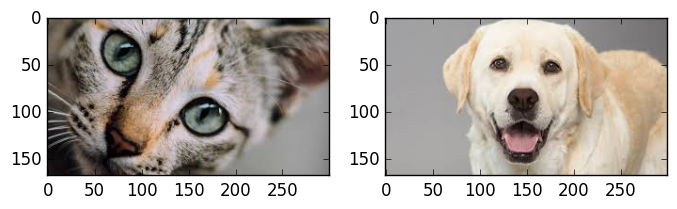

In [530]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog)

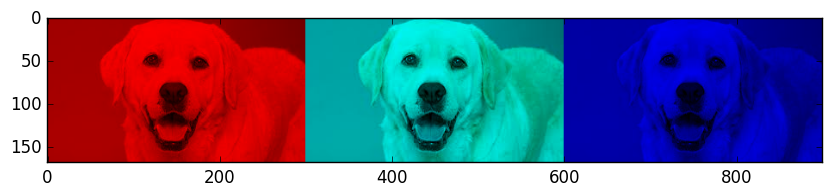

In [531]:
# Merah
dog_r = dog.copy()
dog_r[:,:,1] = dog_r[:,:,2] = 0
# Hijau
dog_g = dog.copy()
dog_g[:,:,0] = dog_r[:,:,2] = 0
# Biru
dog_b = dog.copy()
dog_b[:,:,0] = dog_b[:,:,1] = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

array([[[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ...,
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       [[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ...,
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       [[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ...,
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       ...,

       [[165,   0,   0],
        [165,   0,   0],
        [165,   0,   0],
        ...,
        [212,   0,   0],
        [211,   0,   0],
        [210,   0,   0]],

       [[165,   0,   0],
        [165,   0,   0],
        [165,   0,   0],
        ...,
        [210,   0,   0],
        [210,   0,   0],
        [209,   0,   0]],

       [[164,   0,   0],
        [164,   0,   0],
        [164,   0,   0],
        ...,
        [209,   0,   0],
        [209,   0,   0],
        [209,   0,   0]]], dtype=uint8)
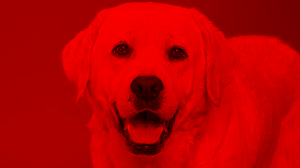

In [532]:
dog_r

## **Nilai piksel gambar skala abu-abu**
Jika berurusan dengan gambar berwarna, mungkin akan sulit bekerja dengan beberapa saluran dan array tiga dimensi. Oleh karena itu, mengonversi gambar ke skala abu-abu adalah cara yang bagus untuk mempertahankan nilai intensitas piksel yang diperlukan tetapi mendapatkan gambar dua dimensi yang mudah diproses. Gambar skala abu-abu biasanya menangkap luminansi atau intensitas setiap piksel sehingga setiap nilai piksel dapat dihitung menggunakan persamaan.
Di mana R, G & B adalah nilai piksel dari tiga saluran dan Y menangkap informasi intensitas piksel akhir dan biasanya berkisar dari 0 (intensitas tidak ada sama sekali - hitam) hingga 1 (intensitas ada sama sekali - putih). Berikut cara mengonversi gambar warna RGB ke skala abu-abu dan mengekstrak nilai piksel mentah, yang dapat digunakan sebagai fitur.

In [533]:
from skimage.color import rgb2gray

cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Image shape:', cgs.shape, '\n')
print('2D image pixel map')
print(np.round(cgs, 2), '\n')
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (168, 300) 

2D image pixel map
[[0.42 0.41 0.41 ... 0.5  0.52 0.53]
 [0.41 0.41 0.4  ... 0.51 0.52 0.54]
 [0.4  0.4  0.4  ... 0.52 0.54 0.55]
 ...
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]] 

Flattened pixel map: [0.42 0.41 0.41 ... 0.51 0.51 0.51]


## **Pengelompokan distribusi intensitas gambar**
Mengelompokkan distribusi intensitas gambar berdasarkan nilai intensitas menggunakan histogram dan menggunakan pengelompokkan sebagai fitur. Di bawah ini menunjukkan bagaimana distribusi intensitas gambar terlihat untuk dua gambar contoh.

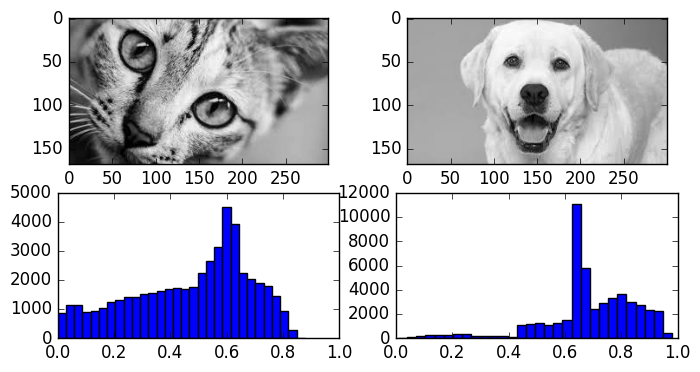

In [534]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)

Intensitas gambar berkisar dari 0 hingga 1 dan terbukti dari sumbu-x yang digambarkan. Sumbu-y menggambarkan frekuensi dari masing-masing bin. Terlihat dengan jelas bahwa gambar anjing memiliki lebih banyak konsentrasi frekuensi bin sekitar 0,6 - 0,8 yang menunjukkan intensitas yang lebih tinggi, sebab anjing Labrador berwarna putih dan putih memiliki nilai intensitas yang tinggi. Variabel c_freq, c_bins, dan d_freq, d_bins dapat digunakan untuk mendapatkan nilai numerik yang berkaitan dengan bin dan digunakan sebagai fitur.

## **Statistik agregasi gambar**
Setelah memperoleh nilai intensitas gambar mentah untuk gambar skala abu-abu.
Salah satu pendekatan adalah menggunakannya sebagai fitur secara langsung atau menggunakan beberapa tingkat agregasi dan ukuran statistik yang dapat diperoleh dari piksel dan intensitas. Kita telah melihat pendekatan pengelompokan nilai intensitas menggunakan histogram. Di bagian ini, ukuran statistik deskriptif dan agregasi digunakan untuk menghitung fitur tertentu dari nilai piksel gambar.

## **Rentang RGB**
Rentang RGB dapat dihitung  untuk setiap gambar dengan mengurangi nilai maksimum dari nilai minimum untuk nilai piksel di setiap saluran.

In [535]:
from scipy.stats import describe

cat_rgb = cat.reshape((168*300), 3).T
dog_rgb = dog.reshape((168*300), 3).T

cs = describe(cat_rgb, axis=1)
ds = describe(dog_rgb, axis=1)

cat_rgb_range = cs.minmax[1] - cs.minmax[0]
dog_rgb_range = ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([cat_rgb_range, dog_rgb_range],
                            columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,Image,R_range,G_range,B_range
0,Cat,240,223,235
1,Dog,246,250,246


## **Agregasi deskriptif**

In [536]:
cat_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cat_rgb, axis=1), 2)]).flatten()
dog_stats= np.array([np.round(ds.mean, 2),np.round(ds.variance, 2),
                        np.round(ds.kurtosis, 2),np.round(ds.skewness, 2),
                        np.round(np.median(dog_rgb, axis=1), 2)]).flatten()

stats_df = pd.DataFrame([cat_stats, dog_stats],
                        columns=['R_mean', 'G_mean', 'B_mean',
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,Image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,Cat,127.48,118.80,111.94,3054.04,2863.78,3003.05,-0.63,-0.77,-0.94,-0.48,-0.50,-0.25,140.0,132.0,120.0
1,Dog,184.46,173.46,160.77,1887.71,1776.00,1574.73,1.30,2.24,2.32,-0.96,-1.12,-1.09,185.0,169.0,165.0


## **Deteksi tepi**
Algoritme ini biasanya melibatkan penggunaan distribusi Gaussian dengan deviasi standar tertentu σ (sigma) untuk menghaluskan dan menghilangkan noise pada gambar. Kemudian, menerapkan filter Sobel untuk mengekstrak gradien intensitas gambar. Nilai norma gradien ini digunakan untuk menentukan kekuatan tepi. Tepi potensial menipis menjadi kurva dengan lebar 1 piksel dan ambang batas berbasis histeresis digunakan untuk memberi label semua titik di atas ambang batas tinggi tertentu sebagai tepi dan kemudian secara rekursif menggunakan nilai ambang batas rendah untuk memberi label titik di atas ambang batas rendah sebagai tepi yang terhubung ke salah satu titik yang diberi label sebelumnya. Kode berikut menerapkan detektor tepi canny ke gambar sampel.

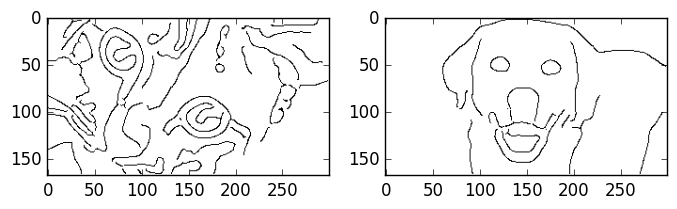

In [537]:
from skimage.feature import canny

cat_edges = canny(cgs, sigma=3)
dog_edges = canny(dgs, sigma=3)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_edges, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_edges, cmap='binary')

Plot gambar berdasarkan larik fitur tepi yang digambarkan pada Gambar dengan jelas menunjukkan tepi yang menonjol dari kucing dan anjing kami. Gunakan larik fitur tepi ini (cat_edges dan dog_edges) dengan meratakannya, mengekstrak nilai piksel dan posisi yang berkaitan dengan tepinya (nilai bukan nol), atau bahkan dengan menggabungkannya seperti mencari jumlah total piksel yang membentuk tepi, nilai rata-rata, dan seterusnya.

## **Deteksi objek**
Teknik menarik lainnya dalam dunia visi komputer adalah deteksi objek, di mana fitur yang berguna untuk menyorot objek tertentu dalam gambar dideteksi dan diekstraksi. Histogram gradien berorientasi, yang juga dikenal sebagai HOG, adalah salah satu teknik yang banyak digunakan dalam deteksi objek. Tidak mungkin membahas detail teknik ini dalam cakupan saat ini, tetapi untuk proses rekayasa fitur, perlu digingat bahwa algoritme HOG bekerja dengan mengikuti serangkaian langkah yang mirip dengan deteksi tepi. Gambar dinormalisasi dan dihilangkan noise untuk menghilangkan efek iluminasi berlebih. Gradien gambar orde pertama dihitung untuk menangkap atribut gambar seperti kontur, tekstur, dan sebagainya. Histogram gradien dibangun di atas gradien ini berdasarkan jendela tertentu yang disebut sel. Akhirnya, sel-sel ini dinormalisasi dan deskriptor fitur yang diratakan diperoleh, yang dapat digunakan sebagai vektor fitur untuk model. Kode berikut menunjukkan teknik deteksi objek HOG pada gambar sampel.

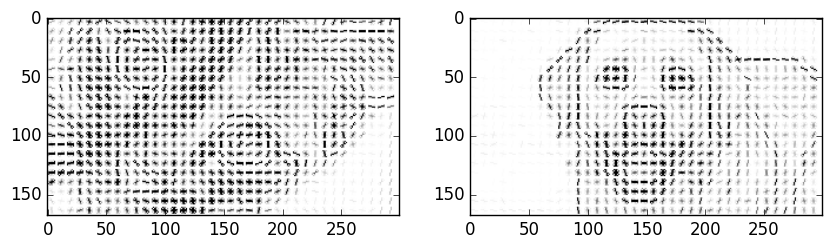

In [538]:
from skimage.feature import hog
from skimage import exposure

fd_cat, cat_hog = hog(cgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualize=True)
fd_dog, dog_hog = hog(dgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualize=True)

cat_hogs = exposure.rescale_intensity(cat_hog, in_range=(0, 0.04))
dog_hogs = exposure.rescale_intensity(dog_hog, in_range=(0, 0.04))

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_hogs, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_hogs, cmap='binary')

Plot gambar menunjukkan bagaimana detektor HOG mengidentifikasi objek dalam gambar sampel.

In [539]:
print(fd_cat, fd_cat.shape)

[0.03784089 0.01940157 0.15044006 ... 0.         0.         0.        ] (47880,)


## **Ekstraksi fitur terlokalisas**
Teknik berbasis ekstraksi fitur terlokalisasi adalah metode yang sedikit lebih baik yang mencoba mendeteksi dan mengekstrak deskriptor fitur terlokalisasi pada berbagai daerah kecil terlokalisasi dari gambar masukan. Oleh karena itu, ini dinamakan ekstraksi fitur terlokalisasi. Algoritma SURF yang populer dan dipatenkan ditemukan oleh Herbert Bay, dkk. SURF adalah singkatan dari *Speeded Up Robust Features*. Ide utamanya adalah untuk mendapatkan deskriptor fitur lokal invarian skala dari gambar yang dapat digunakan nanti sebagai fitur gambar. Algoritma ini mirip dengan algoritma SIFT yang populer. Ada dua fase utama dalam algoritma ini. Fase pertama adalah mendeteksi titik minat menggunakan filter berbentuk persegi dan matriks hessian. Fase kedua adalah membangun deskriptor fitur dengan mengekstraksi fitur terlokalisasi di sekitar titik minat ini. Biasanya dihitung dengan mengambil daerah gambar persegi terlokalisasi di sekitar titik minat dan kemudian mengagregasi respons wavelet Haar pada titik sampel berbasis interval tertentu.

In [540]:
!pip install mahotas

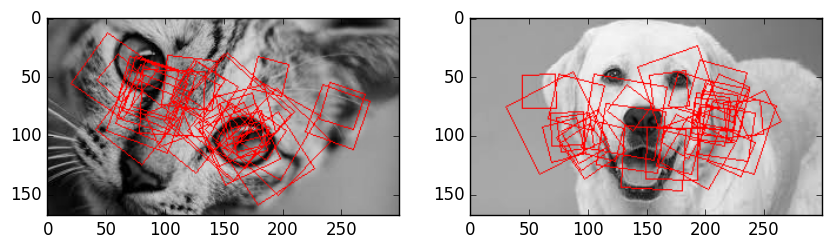

In [541]:
from mahotas.features import surf
import mahotas as mh

cat_mh = mh.colors.rgb2gray(cat)
dog_mh = mh.colors.rgb2gray(dog)

cat_surf = surf.surf(cat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)
dog_surf = surf.surf(dog_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=54)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(cat_mh, cat_surf))
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(surf.show_surf(dog_mh, dog_surf))

Kotak persegi dalam plot gambar menggambarkan wilayah gambar persegi di sekitar titik-titik yang diminati yang digunakan untuk ekstraksi fitur lokal. Juga, dapat menggunakan fungsi `surf.dense(...)` untuk mengekstrak deskriptor fitur berdimensi seragam pada titik-titik padat dengan jarak interval reguler dalam piksel. Kode berikut menggambarkan cara mencapainya.

In [542]:
cat_surf_fds = surf.dense(cat_mh, spacing=10)
dog_surf_fds = surf.dense(dog_mh, spacing=10)
cat_surf_fds.shape

(140, 64)

## **Model Visual Bag of Words**
## **Fitur rekayasa dari deskripsi fitur SURF dengan pengelompokan**

In [543]:
from sklearn.cluster import KMeans

k = 20
km = KMeans(k, n_init=100, max_iter=100)

surf_fd_features = np.array([cat_surf_fds, dog_surf_fds])
km.fit(np.concatenate(surf_fd_features))

vbow_features = []
for feature_desc in surf_fd_features:
    labels = km.predict(feature_desc)
    vbow = np.bincount(labels, minlength=k)
    vbow_features.append(vbow)

vbow_df = pd.DataFrame(vbow_features)
pd.concat([df, vbow_df], axis=1)

,Image,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Cat,9,11,2,7,0,9,4,7,13,...,10,13,10,9,25,0,1,1,0,0
1,Dog,13,9,3,15,14,4,3,10,12,...,5,8,10,4,10,2,3,3,2,3


## **Mencoba alur kerja VBOW pada citra baru**

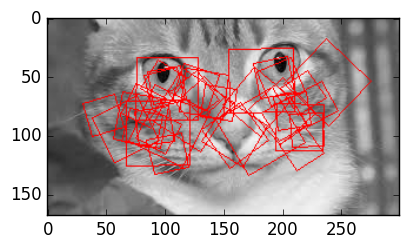

In [544]:
new_cat = io.imread('/content/new_cat.png')
newcat_mh = mh.colors.rgb2gray(new_cat)
newcat_surf = surf.surf(newcat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(newcat_mh, newcat_surf))

In [545]:
new_surf_fds = surf.dense(newcat_mh, spacing=10)

labels = km.predict(new_surf_fds)
new_vbow = np.bincount(labels, minlength=k)
pd.DataFrame([new_vbow])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,17,14,1,2,2,9,1,14,9,18,9,12,8,17,3,0,0,4,0,0


In [546]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

eucdis = euclidean_distances(new_vbow.reshape(1,-1) , vbow_features)
cossim = cosine_similarity(new_vbow.reshape(1,-1) , vbow_features)

result_df = pd.DataFrame({'EuclideanDistance': eucdis[0],
              'CosineSimilarity': cossim[0]})
pd.concat([df, result_df], axis=1)

,Image,EuclideanDistance,CosineSimilarity
0,Cat,28.670542,0.765763
1,Dog,28.530685,0.746474


## **Rekayasa Fitur Otomatis dengan Pembelajaran Mendalam**

In [547]:
!pip install tensorflow

In [548]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K

## **Membangun CNN 2-lapisan dasar**

In [549]:
model = Sequential()
model.add(Conv2D(4, (4, 4), input_shape=(168, 300, 3), activation='relu',
                 kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (4, 4), activation='relu',
                kernel_initializer='glorot_uniform'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Visualisasikan Arsitektur CNN**

In [550]:
!pip install pydot graphviz

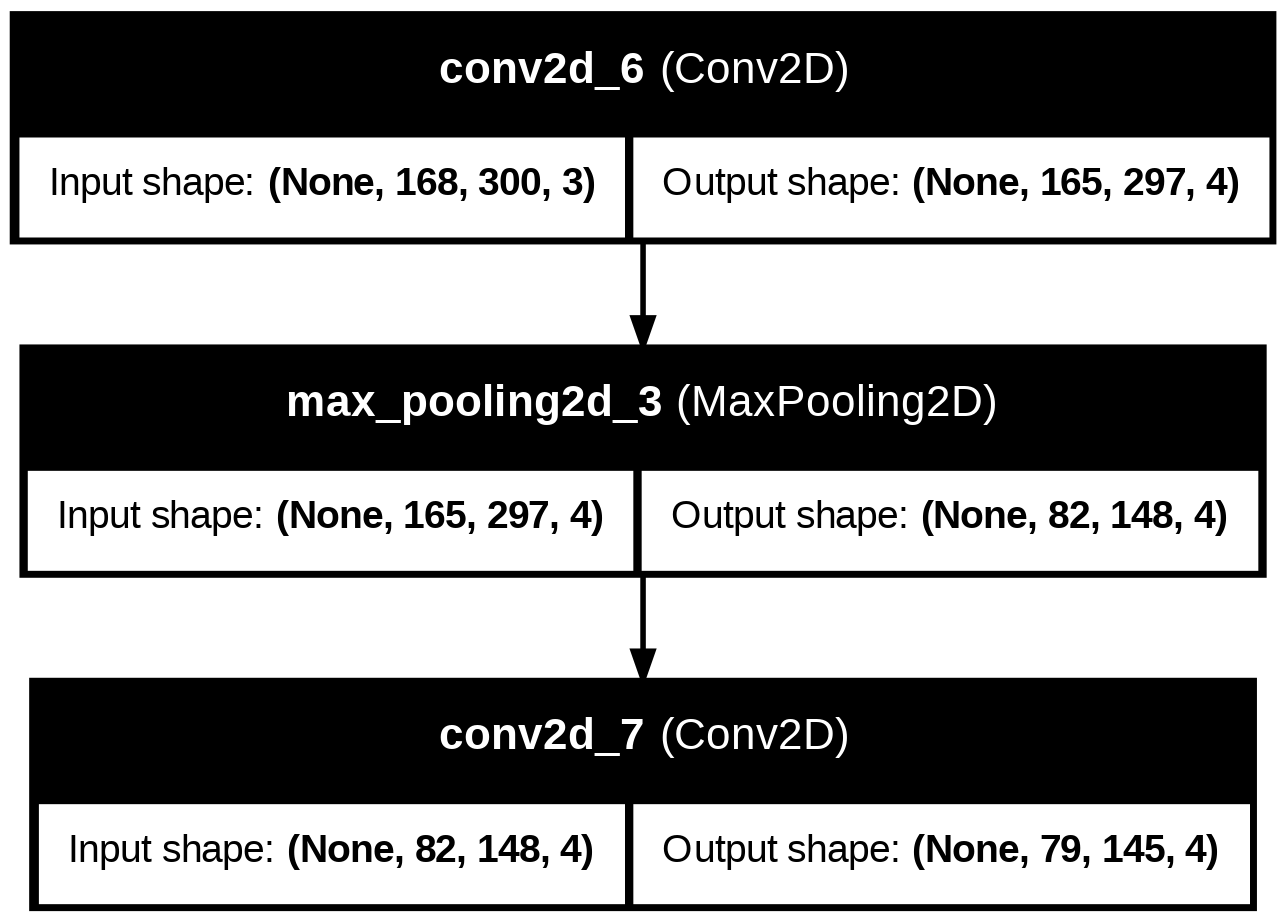

In [551]:
from IPython.display import Image
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')
Image(filename='model.png')

Gambar tersebut menggunakan dua lapisan Konvolusional dua dimensi yang berisi empat filter (4x4). Serta, memiliki lapisan Max Pool di antara keduanya dengan ukuran (2x2) untuk beberapa downsampling.

## **Membangun fungsi untuk mengekstrak fitur dari lapisan perantara**

In [552]:
import tensorflow as tf

first_conv_layer = tf.keras.Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
second_conv_layer = tf.keras.Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

# **Ekstrak dan visualisasikan fitur representasi gambar**

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_21
Received: inputs=['Tensor(shape=(1, 168, 300, 3))']
  warnings.warn(msg)


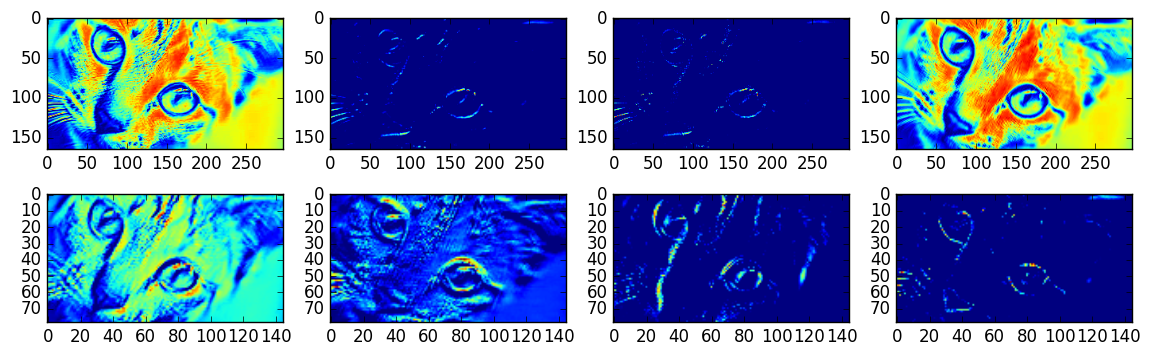

In [553]:
import matplotlib.pyplot as plt

catr = cat.reshape(1, 168, 300, 3)

# Ekstrak Fitur
first_conv_features = first_conv_layer([catr])[0]
second_conv_features = second_conv_layer([catr])[0]

# Melihat Representasi Fitur
fig, axes = plt.subplots(2, 4, figsize=(14, 4))

# Ulangi melalui saluran untuk lapisan konvolusional pertama
for i in range(first_conv_features.shape[-1]):
    row = 0
    col = i
    axes[row, col].imshow(first_conv_features[:, :, i])

# Ulangi melalui saluran untuk lapisan konvolusional kedua
for i in range(second_conv_features.shape[-1]):
    row = 1
    col = i
    axes[row, col].imshow(second_conv_features[:, :, i])

plt.show()

Visualisasi peta fitur yang digambarkan sangat menarik. Dapat dilihat bahwa setiap matriks fitur yang dihasilkan oleh jaringan saraf konvolusional mencoba mempelajari sesuatu tentang gambar seperti tekstur, sudut, tepi, iluminasi, rona, kecerahan, dan sebagainya. Ini memberikan gambaran tentang bagaimana peta fitur aktivasi ini kemudian dapat digunakan sebagai fitur untuk gambar. Bahkan dapat menumpuk output CNN, meratakannya jika diperlukan, dan meneruskannya sebagai lapisan input ke jaringan saraf perceptron yang terhubung penuh multi-lapisan dan menggunakannya untuk memecahkan masalah klasifikasi gambar.

In [554]:
sample_features = np.round(np.array(first_conv_features[:,:,1], dtype='float'), 2)
print(sample_features)
print(sample_features.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(165, 297)


# **6. Feature Scaling**
Saat berhadapan dengan fitur numerik, terdapat atribut spesifik yang mungkin sifatnya tidak terbatas, seperti jumlah tampilan video atau klik halaman web. Menggunakan nilai mentah sebagai fitur input dapat membuat model bias terhadap fitur yang memiliki nilai magnitudo yang sangat tinggi. Model-model ini biasanya sensitif terhadap magnitudo atau skala fitur seperti regresi linier atau logistik. Model lain seperti metode berbasis pohon masih dapat bekerja tanpa penskalaan fitur. Namun, tetap disarankan untuk menormalkan dan memperkecil fitur dengan penskalaan fitur, terutama jika ingin mencoba beberapa algoritma Pembelajaran Mesin pada fitur input.

## **Memuat data contoh tayangan video**

In [555]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

In [556]:
views = pd.DataFrame([1295., 25., 19000., 5., 1., 300.], columns=['views'])
views

,views
0,1295.0
1,25.0
2,19000.0
3,5.0
4,1.0
5,300.0


## **Standard Scaler**

In [557]:
ss = StandardScaler()
views['zscore'] = ss.fit_transform(views[['views']])
views

,views,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747
5,300.0,-0.449877


In [558]:
vw = np.array(views['views'])
(vw[0] - np.mean(vw)) / np.std(vw)

-0.30721413311687235

## **Min-Max Scaler**

In [559]:
mms = MinMaxScaler()
views['minmax'] = mms.fit_transform(views[['views']])
views

,views,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


In [560]:
(vw[0] - np.min(vw)) / (np.max(vw) - np.min(vw))

0.06810884783409653

## **Robust Scaler**

In [561]:
rs = RobustScaler()
views['robust'] = rs.fit_transform(views[['views']])
views

,views,zscore,minmax,robust
0,1295.0,-0.307214,0.068109,1.092883
1,25.0,-0.489306,0.001263,-0.132690
2,19000.0,2.231317,1.000000,18.178528
3,5.0,-0.492173,0.000211,-0.151990
4,1.0,-0.492747,0.000000,-0.155850
5,300.0,-0.449877,0.015738,0.132690


In [562]:
quartiles = np.percentile(vw, (25., 75.))
iqr = quartiles[1] - quartiles[0]
(vw[0] - np.median(vw)) / iqr

1.0928829915560916

# **7. Feature Selection**
Meskipun bagus untuk mencoba merekayasa fitur yang mencoba menangkap beberapa representasi dan pola dalam data yang mendasarinya. Namun, tidak selalu bagus untuk menangani set fitur yang mungkin memiliki ribuan atau lebih fitur. Lebih banyak fitur cenderung membuat model lebih kompleks dan sulit ditafsirkan. Selain itu, sering kali dapat menyebabkan model terlalu pas pada data pelatihan. Hal ini pada dasarnya mengarah pada model yang sangat khusus yang hanya disesuaikan dengan data yang digunakan untuk pelatihan dan karenanya meskipun mendapatkan kinerja model yang tinggi, kinerjanya akan sangat buruk pada data baru yang sebelumnya tidak terlihat. Tujuan utamanya adalah untuk memilih jumlah fitur yang optimal untuk dilatih dan membangun model yang digeneralisasi dengan sangat baik pada data dan mencegah overfitting. Strategi pemilihan fitur dapat dibagi menjadi tiga area utama berdasarkan jenis strategi dan teknik yang digunakan untuk hal yang sama. Ketiganya dijelaskan secara singkat sebagai berikut.
* **Metode filter**: Teknik ini memilih fitur murni berdasarkan metrik seperti korelasi, informasi mutual, dan sebagainya. Metode ini tidak bergantung pada hasil yang diperoleh dari model mana pun dan biasanya memeriksa hubungan setiap fitur dengan variabel respons yang akan diprediksi. Metode yang populer meliputi metode berbasis ambang batas dan uji statistik.
* **Metode wrapper**: Teknik ini mencoba menangkap interaksi antara beberapa fitur dengan menggunakan pendekatan rekursif untuk membangun beberapa model menggunakan subset fitur dan memilih subset fitur terbaik yang memberi kita model berkinerja terbaik. Metode seperti backward picking dan forward removal adalah metode berbasis wrapper yang populer.
* **Metode embedded**: Teknik ini mencoba menggabungkan manfaat dari dua metode lainnya dengan memanfaatkan model Machine Learning itu sendiri untuk memberi peringkat dan skor variabel fitur berdasarkan kepentingannya. Metode berbasis pohon seperti pohon keputusan dan metode ensemble seperti random forest adalah contoh populer dari metode embedded.

Pemilihan fitur digunakan untuk model berkinerja lebih baik, overfitting lebih sedikit, model lebih umum, lebih sedikit waktu untuk komputasi dan pelatihan model, dan untuk mendapatkan wawasan yang baik dalam memahami pentingnya berbagai fitur dalam data.

In [563]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']

## **Metode Threshold based/ Ambang Batas**
## **Fitur pembatas dalam model berbasis bag of word**

In [564]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0.1, max_df=0.85, max_features=2000)
cv

CountVectorizer(max_df=0.85, max_features=2000, min_df=0.1)

## **Thresholding berbasis varians**

In [565]:
df = pd.read_csv('/content/Pokemon.csv')
poke_gen = pd.get_dummies(df['Generation'])
poke_gen.head()

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False


In [566]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=.15)
vt.fit(poke_gen)

VarianceThreshold(threshold=0.15)

In [567]:
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=poke_gen.columns).T

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
variance,0.164444,0.114944,0.16,0.128373,0.163711,0.091994
select_feature,True,False,True,False,True,False


In [568]:
poke_gen_subset = poke_gen.iloc[:,vt.get_support()].head()
poke_gen_subset

,Gen 1,Gen 3,Gen 5
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


## **Metode Statistika**

In [569]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()
bc_features = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
bc_classes = pd.DataFrame(bc_data.target, columns=['IsMalignant'])

bc_X = np.array(bc_features)
bc_y = np.array(bc_classes).T[0]
print('Feature set shape:', bc_X.shape)
print('Response class shape:', bc_y.shape)

Feature set shape: (569, 30)
Response class shape: (569,)


In [570]:
np.set_printoptions(threshold=30)
print('Feature set data [shape: '+str(bc_X.shape)+']')
print(np.round(bc_X, 2), '\n')
print('Feature names:')
print(np.array(bc_features.columns), '\n')
print('Predictor Class label data [shape: '+str(bc_y.shape)+']')
print(bc_y, '\n')
print('Predictor name:', np.array(bc_classes.columns))
np.set_printoptions(threshold=pt)

Feature set data [shape: (569, 30)]
[[ 17.99  10.38 122.8  ...   0.27   0.46   0.12]
 [ 20.57  17.77 132.9  ...   0.19   0.28   0.09]
 [ 19.69  21.25 130.   ...   0.24   0.36   0.09]
 ...
 [ 16.6   28.08 108.3  ...   0.14   0.22   0.08]
 [ 20.6   29.33 140.1  ...   0.26   0.41   0.12]
 [  7.76  24.54  47.92 ...   0.     0.29   0.07]] 

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Predictor Class label data [shape: (569,)]
[0 0 0 ... 0 0 1] 

Predictor name: ['IsMaligna

In [571]:
from sklearn.feature_selection import chi2, SelectKBest

skb = SelectKBest(score_func=chi2, k=15)
skb.fit(bc_X, bc_y)

SelectKBest(k=15, score_func=<function chi2 at 0x7e09f09991c0>)

In [572]:
feature_scores = [(item, score) for item, score in zip(bc_data.feature_names, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])[:10]

[('worst area', 112598.43156405364),
 ('mean area', 53991.65592375085),
 ('area error', 8758.504705334473),
 ('worst perimeter', 3665.0354163405946),
 ('mean perimeter', 2011.1028637679046),
 ('worst radius', 491.6891574333232),
 ('mean radius', 266.104917195178),
 ('perimeter error', 250.57189635982192),
 ('worst texture', 174.4493996057108),
 ('mean texture', 93.8975080986333)]

In [573]:
select_features_kbest = skb.get_support()
feature_names_kbest = bc_data.feature_names[select_features_kbest]
feature_subset_df = bc_features[feature_names_kbest]
bc_SX = np.array(feature_subset_df)
print(bc_SX.shape)
print(feature_names_kbest)

(569, 15)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concavity' 'radius error' 'perimeter error' 'area error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst compactness' 'worst concavity' 'worst concave points']


In [574]:
np.round(feature_subset_df.iloc[20:25], 2)

,mean radius,mean texture,mean perimeter,mean area,mean concavity,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
20,13.08,15.71,85.63,520.0,0.05,0.19,1.38,14.67,14.50,20.49,96.09,630.5,0.28,0.19,0.07
21,9.50,12.44,60.34,273.9,0.03,0.28,1.91,15.70,10.23,15.66,65.13,314.9,0.11,0.09,0.06
22,15.34,14.26,102.50,704.4,0.21,0.44,3.38,44.91,18.07,19.08,125.10,980.9,0.60,0.63,0.24
23,21.16,23.04,137.20,1404.0,0.11,0.69,4.30,93.99,29.17,35.59,188.00,2615.0,0.26,0.32,0.20
24,16.65,21.38,110.00,904.6,0.15,0.81,5.46,102.60,26.46,31.56,177.00,2215.0,0.36,0.47,0.21


In [575]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

full_feat_acc = np.average(cross_val_score(lr, bc_X, bc_y, scoring='accuracy', cv=5))
sel_feat_acc = np.average(cross_val_score(lr, bc_SX, bc_y, scoring='accuracy', cv=5))

print('Model accuracy statistics with 5-fold cross validation')
print('Model accuracy with complete feature set', bc_X.shape, ':', full_feat_acc)
print('Model accuracy with selected feature set', bc_SX.shape, ':', sel_feat_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model accuracy statistics with 5-fold cross validation
Model accuracy with complete feature set (569, 30) : 0.9385188635305075
Model accuracy with selected feature set (569, 15) : 0.9420431609998448


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## **Penghapusan Fitur Rekursif**

In [576]:
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=15, step=1)
rfe.fit(bc_X, bc_y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [577]:
select_features_rfe = rfe.get_support()
feature_names_rfe = bc_data.feature_names[select_features_rfe]
print(feature_names_rfe)

['mean radius' 'mean compactness' 'mean concavity' 'mean concave points'
 'radius error' 'texture error' 'perimeter error' 'compactness error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst fractal dimension']


In [578]:
set(feature_names_kbest) & set(feature_names_rfe)

{'mean concavity',
 'mean radius',
 'perimeter error',
 'radius error',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst perimeter',
 'worst radius',
 'worst texture'}

## **Seleksi Berdasakan Model**

In [579]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(bc_X, bc_y)

RandomForestClassifier()

In [580]:
importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(bc_data.feature_names, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

[('worst perimeter', 0.16742839516987013),
 ('worst concave points', 0.1569055680353432),
 ('worst area', 0.12001718426406592),
 ('mean concave points', 0.09314712797670556),
 ('worst radius', 0.08643279785271668),
 ('mean perimeter', 0.05812906054704734),
 ('mean concavity', 0.04823243094755126),
 ('mean radius', 0.03584125804195593),
 ('worst concavity', 0.029769511829714556),
 ('area error', 0.023517649888206003)]

## **Ekstraksi fitur menggunakan reduksi dimensionalitas**

In [581]:
# pusatkan set fitur
bc_XC = bc_X - bc_X.mean(axis=0)

# dekomposisi menggunakan SVD
U, S, VT = np.linalg.svd(bc_XC)

# dapatkan komponen utama
PC = VT.T

# dapatkan 3 komponen utama pertama
PC3 = PC[:, 0:3]
PC3.shape

(30, 3)

In [582]:
# mengurangi dimensi set fitur
np.round(bc_XC.dot(PC3), 2)

array([[-1160.14,  -293.92,   -48.58],
       [-1269.12,    15.63,    35.39],
       [ -995.79,    39.16,     1.71],
       ...,
       [ -314.5 ,    47.55,    10.44],
       [-1124.86,    34.13,    19.74],
       [  771.53,   -88.64,   -23.89]])

In [583]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(bc_X)

PCA(n_components=3)

In [584]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649, 0.00155751])

In [585]:
bc_pca = pca.transform(bc_X)
np.round(bc_pca, 2)

array([[1160.14, -293.92,   48.58],
       [1269.12,   15.63,  -35.39],
       [ 995.79,   39.16,   -1.71],
       ...,
       [ 314.5 ,   47.55,  -10.44],
       [1124.86,   34.13,  -19.74],
       [-771.53,  -88.64,   23.89]])

In [586]:
np.average(cross_val_score(lr, bc_pca, bc_y, scoring='accuracy', cv=5))

0.9262071106970968